In [1]:
# session plan
# Prepare the data for unsupervised learning
# perform the unsupervised learning and log it in the ml flow
# Outline/ prepare a rough blueprint for the streamlit application

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('D:\GIT HUB\GUVI Mini Proj 4\clickstream_venv\E-Commerce-Customer-conversion\df_train_preprocessed_unsupervised_learning.csv')

In [ ]:
# Data pre-processing
# remove the target columns and target encoded columns - done
# Binary encode the target encoded column - done
# remove unique valued columns - done
# --
# find the correlation and remove the ones with high colinearity 
# use correlation, PCA, Forest Isolation 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 38 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   model_photography             132379 non-null  int64  
 1   page                          132379 non-null  int64  
 2   page2_clothing_model_grouped  132379 non-null  object 
 3   country_grouped_9             132379 non-null  int64  
 4   country_grouped_24            132379 non-null  int64  
 5   country_grouped_29            132379 non-null  int64  
 6   country_grouped_46            132379 non-null  int64  
 7   country_grouped_RARE_GROUP    132379 non-null  int64  
 8   page1_main_category_1         132379 non-null  int64  
 9   page1_main_category_2         132379 non-null  int64  
 10  page1_main_category_3         132379 non-null  int64  
 11  page1_main_category_4         132379 non-null  int64  
 12  colour_1                      132379 non-nul

In [4]:
remove=['Unnamed: 0','year','month','day','model_target_encoded','model_target_encoded_scaled','order_transformed',
                 'price_transformed', 'price','price_2','page2_clothing_model','country','order','session_id'] #'session_id', - keeping this for interpretation later

In [81]:
# Binary encoding
from category_encoders import BinaryEncoder

column_to_encode = 'page2_clothing_model_grouped'

print("---original data shape---")

print(df.head())
print(f"Unique values in '{column_to_encode}': {df[column_to_encode].nunique()}")
print("-" * 30)

## --- 2. Perform Binary Encoding ---

# 1. Initialize the BinaryEncoder
# We specify the columns we want to encode in a list

encoder = BinaryEncoder(cols=[column_to_encode])

# 2. Fit and Transform the data
df_encoded = encoder.fit_transform(df)

## --- 3. Review Results ---

# Get the names of the newly created binary columns
new_binary_cols = [col for col in df_encoded.columns if col.startswith(f'{column_to_encode}_') ] 

print("--- Encoded Data Shape ---")
print(f"Original columns: {df.shape[1]}")
print(f"New columns: {df_encoded.shape[1]}")
print(f"Number of new binary columns: {len(new_binary_cols)}")
print("-" * 30)
print(df_encoded.head())

# The original 'page2_clothing_model_grouped' column is replaced by the new binary columns
print(f"\n new binary columns: {new_binary_cols}")

---original data shape---
   Unnamed: 0  year  month  day  order  country  session_id  \
0           0  2008      6   22     21       29       15648   
1           1  2008      5   19      6       29       10018   
2           2  2008      7   15      2       29       19388   
3           3  2008      5    2      2       29        7181   
4           4  2008      6    9     16       29       13493   

  page2_clothing_model  model_photography  price  ...  location_4  location_5  \
0                  C20                  1     48  ...           0           0   
1                  B26                  0     57  ...           0           0   
2                  C13                  0     48  ...           0           1   
3                  B11                  0     43  ...           1           0   
4                  B31                  0     57  ...           0           1   

   location_6     month_sin month_cos   day_sin   day_cos  \
0           0  1.224647e-16 -1.000000 -0.968077

In [6]:
# removed the non-essential columns
df_encoded.drop(columns = remove,inplace=True) 

In [27]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   model_photography               132379 non-null  int64  
 1   page                            132379 non-null  int64  
 2   page2_clothing_model_grouped_0  132379 non-null  int64  
 3   page2_clothing_model_grouped_1  132379 non-null  int64  
 4   page2_clothing_model_grouped_2  132379 non-null  int64  
 5   page2_clothing_model_grouped_3  132379 non-null  int64  
 6   page2_clothing_model_grouped_4  132379 non-null  int64  
 7   page2_clothing_model_grouped_5  132379 non-null  int64  
 8   page2_clothing_model_grouped_6  132379 non-null  int64  
 9   country_grouped_9               132379 non-null  int64  
 10  country_grouped_24              132379 non-null  int64  
 11  country_grouped_29              132379 non-null  int64  
 12  country_grouped_

In [ ]:
# df_encoded_vif_cal = df_encoded.copy() # dont use now
# df_encoded.head()

,model_photography,page,page2_clothing_model_grouped_0,page2_clothing_model_grouped_1,page2_clothing_model_grouped_2,page2_clothing_model_grouped_3,page2_clothing_model_grouped_4,page2_clothing_model_grouped_5,page2_clothing_model_grouped_6,country_grouped_9,...,location_3,location_4,location_5,location_6,month_sin,month_cos,day_sin,day_cos,price_transformed_scaled,order_transformed_scaled
0,1,2,0,0,0,0,0,0,1,0,...,0,0,0,0,1.224647e-16,-1.000000,-0.968077,-0.250653,0.440921,1.244064
1,0,2,0,0,0,0,0,1,0,0,...,1,0,0,0,5.000000e-01,-0.866025,-0.651372,-0.758758,1.060193,0.090166
2,0,1,0,0,0,0,0,1,1,0,...,0,0,1,0,-5.000000e-01,-0.866025,0.101168,-0.994869,0.440921,-0.921746
3,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,5.000000e-01,-0.866025,0.394356,0.918958,0.054251,-0.921746
4,0,2,0,0,0,0,1,0,1,0,...,0,0,1,0,1.224647e-16,-1.000000,0.968077,-0.250653,1.060193,0.993591


In [7]:
# performing the k-1 rule before calculating VIF for multicollinearity. 
# 1 OHE column(to escape dummy variable trap) must be dropped before performing VIF to avoid the infinty VIF score trap
df_encoded.drop(columns=['country_grouped_9','page1_main_category_1','colour_1','location_1'], inplace = True)

In [ ]:
# These binary encoded features will not removed after vif calculation. will only be removed as whole if the VIF score is too high
# These are used in the calculation of the VIF score though 
# same case for the cyclic_encoded columns
binary_encoded_cols =['page2_clothing_model_grouped_6','page2_clothing_model_grouped_5','page2_clothing_model_grouped_4','page2_clothing_model_grouped_3','page2_clothing_model_grouped_2','page2_clothing_model_grouped_1','page2_clothing_model_grouped_0']
cyclic_encoded_cols = ['month_sin','month_cos','day_sin','day_cos']
do_not_remove_after_vif = []
do_not_remove_after_vif.extend(binary_encoded_cols)
do_not_remove_after_vif.extend(cyclic_encoded_cols)

In [8]:
# --- 2. Check and Address Multicollinearity using VIF ---

def calculate_vif(X):
    """Calculates VIF for all features in the DataFrame X."""
    vif_data = pd.DataFrame()
    vif_data['feature'] = X.columns
    # Calculate VIF for each feature
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_data = vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True)
    return vif_data

In [9]:
VIF_THRESHOLD = 10.0 # Standard threshold for severe multicollinearity

def reduce_multicollinearity(X, threshold=VIF_THRESHOLD):
    """
    Iteratively removes features with VIF > threshold until all features are acceptable.
    """
    print(f"Starting VIF check with threshold: {threshold}")
    X_clean = X.copy()
    
    # Loop to iteratively remove the highest VIF feature
    while True:
        vif_results = calculate_vif(X_clean)
        max_vif = vif_results['VIF'].iloc[0]
        
        if max_vif > threshold:
            feature_to_drop = vif_results['feature'].iloc[0]
            # if feature_to_drop not in do_not_remove_after_vif: 
            # the above line will put code in loop. just calculate the vif 
            # and see the output to verify the removed ones and add them if it is a binary or cyclic encoded feature

            X_clean = X_clean.drop(columns=[feature_to_drop])
            print(f"Dropped feature: '{feature_to_drop}' (VIF: {max_vif:.2f})")
        else:
            print("\nMulticollinearity successfully reduced. All remaining VIFs are below the threshold.")
            break
            
        if X_clean.shape[1] < 2:
            print("Warning: Too few features remaining. Stopping VIF reduction.")
            break
            
    print(f"Final Feature Count after VIF reduction: {X_clean.shape[1]}")
    return X_clean, calculate_vif(X_clean)

# this IF condition will make the code stuck in loop if the feature is present in the do_not_remove. 
# just run it as it is and use this condition as for reference and re-reun the previous steps or copy the un-altered dataframe from previous step.
# remove only the appropriate columns based on the output of this function

In [44]:
# Execute VIF reduction
df_encoded_final_vif, final_vif_report = reduce_multicollinearity(df_encoded)
print("\n--- Final VIF Report (Top 10) ---")
print(final_vif_report.head(10))
print("-" * 50)

Starting VIF check with threshold: 10.0
Dropped feature: 'month_cos' (VIF: 13.70)

Multicollinearity successfully reduced. All remaining VIFs are below the threshold.
Final Feature Count after VIF reduction: 39

--- Final VIF Report (Top 10) ---
                          feature       VIF
0              country_grouped_29  7.816145
1                            page  6.923619
2  page2_clothing_model_grouped_6  5.352978
3                        colour_2  4.230730
4                        colour_3  3.353607
5           page1_main_category_4  3.312707
6                        colour_9  3.291281
7           page1_main_category_2  3.163537
8           page1_main_category_3  3.153155
9                       colour_14  3.137379
--------------------------------------------------


In [10]:
# Since there is no feature that can be removed is above the threshold. 
# we will use the main data with no changes to perform PCA
df_encoded_final_vif = df_encoded.copy()

Starting PCA to determine optimal dimensionality...
Components needed to explain 85% variance: 17


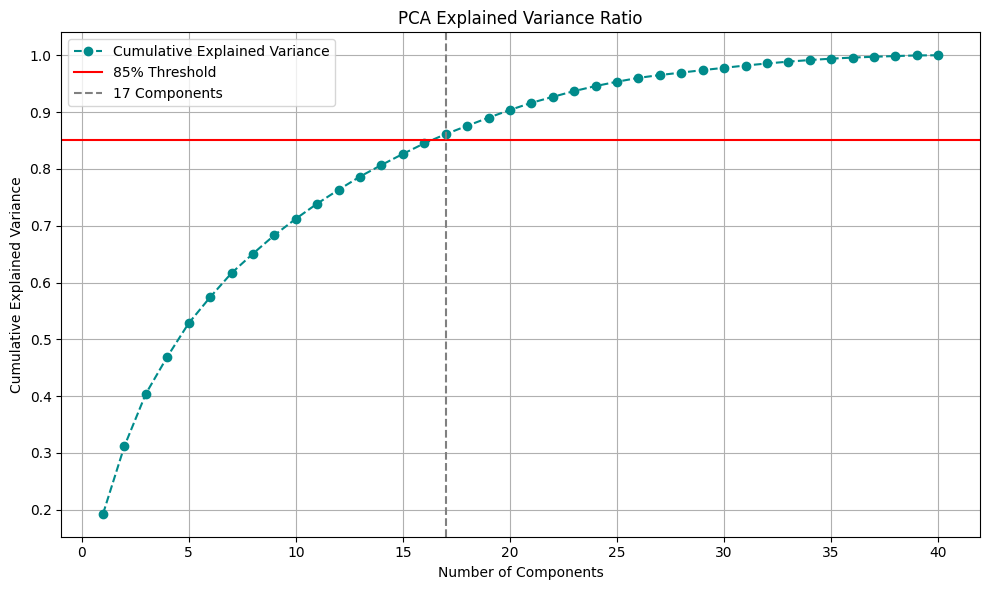

In [80]:
# --- 3. Principal Component Analysis (PCA) ---

print("Starting PCA to determine optimal dimensionality...")

# Fit PCA to the final dataset
pca = PCA().fit(df_encoded_final_vif)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components needed to explain 85% of variance
n_components_85 = np.argmax(cumulative_variance >= 0.85) + 1 

print(f"Components needed to explain 85% variance: {n_components_85}")

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, df_encoded_final_vif.shape[1] + 1), cumulative_variance, marker='o', linestyle='--', color='darkcyan', label='Cumulative Explained Variance')
plt.axhline(y=0.85, color='r', linestyle='-', label='85% Threshold')
plt.axvline(x=n_components_85, color='gray', linestyle='--', label=f'{n_components_85} Components')
plt.title('PCA Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
# After determining the number of components (k), transform the data:
pca_final = PCA(n_components=n_components_85)
X_pca = pca_final.fit_transform(df_encoded_final_vif)

print(f"\nFinal Data Shape for Clustering: {X_pca.shape}")


Final Data Shape for Clustering: (132379, 17)


In [13]:
# simply viewing the transformed data using PCA
d = pd.DataFrame(X_pca)
d.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.986233,1.008406,0.264048,-1.006258,0.072499,-0.379492,-0.347309,-0.129832,0.631734,-0.227364,-0.486289,0.085398,-0.532300,0.259328,0.355018,0.362812,0.054688
1,-0.412396,1.070565,-0.467598,-1.004351,-0.455698,0.011176,0.108196,0.228421,-0.230022,-0.003266,-0.005164,-0.185895,-0.765856,-0.718614,-0.486951,-0.209778,0.975153
2,-0.873946,-0.393201,-0.358404,-0.110255,-1.042647,-0.504041,-0.398595,-0.082768,0.724982,-1.003967,-0.378378,0.067476,-0.327906,-0.871459,-0.151651,0.625357,-0.480896
3,-1.152113,-0.478486,-0.156306,0.497566,0.803274,-0.414721,0.699797,1.209700,-0.044633,0.327163,0.598741,-0.241875,-0.370821,0.165111,0.217479,-0.486851,-0.088313
4,0.121135,1.475476,0.137361,0.733212,-0.485863,0.098787,0.149838,0.831120,0.356595,-0.003121,0.226040,0.904207,0.084125,-0.926244,0.009470,0.057951,-0.447749


In [ ]:
#unsupervised learning

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings

In [15]:
# Suppress K-Means initialization warnings for cleaner output
warnings.filterwarnings("ignore", category=FutureWarning)

# --- Configuration ---
N_COMPONENTS = n_components_85 #17 PCs # PCA analysis determined 17 components are optimal
MAX_K_CLUSTERS = 15 # Maximum K to test (e.g., test K from 2 to 15)

In [16]:
# --- 2. Determine Optimal K using the Elbow Method ---

wcss = []
k_range = range(2, MAX_K_CLUSTERS + 1)

print("Starting Elbow Method (WCSS calculation)...")

# Calculate WCSS for various values of K
for k in k_range:
    # Use 'k-means++' for smarter initial centroid selection
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
    
print("WCSS calculation complete.")

Starting Elbow Method (WCSS calculation)...
WCSS calculation complete.


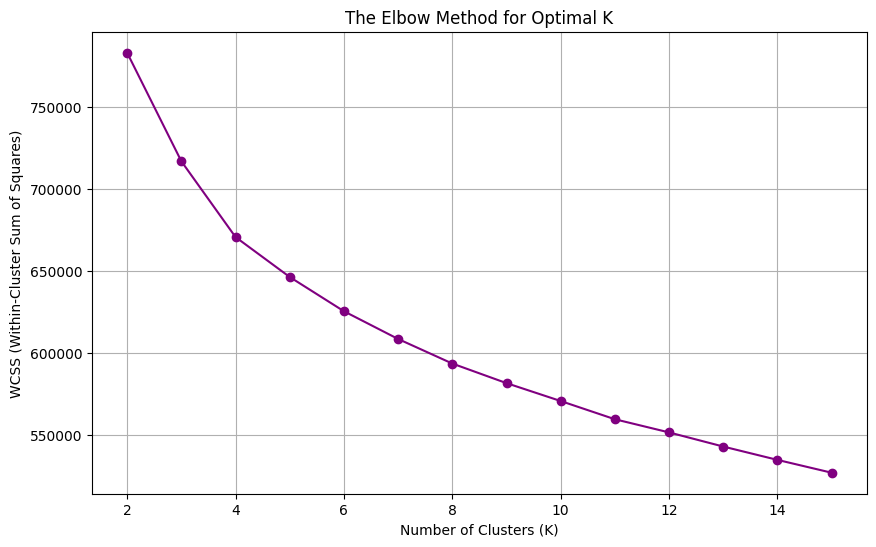

Analyze the plot: Look for the 'elbow' where the curve sharply bends.
--------------------------------------------------


In [17]:
# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='-', color='purple')
plt.title('The Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

print("Analyze the plot: Look for the 'elbow' where the curve sharply bends.")
print("-" * 50)

In [19]:
N_ROWS = df_encoded_final_vif.shape[0]

Starting Silhouette Score Calculation...
K=2: Silhouette Score = 0.1484
K=3: Silhouette Score = 0.1171
K=4: Silhouette Score = 0.1067
K=5: Silhouette Score = 0.0955
K=6: Silhouette Score = 0.0939
K=7: Silhouette Score = 0.0871
K=8: Silhouette Score = 0.0836
K=9: Silhouette Score = 0.0799
K=10: Silhouette Score = 0.0814


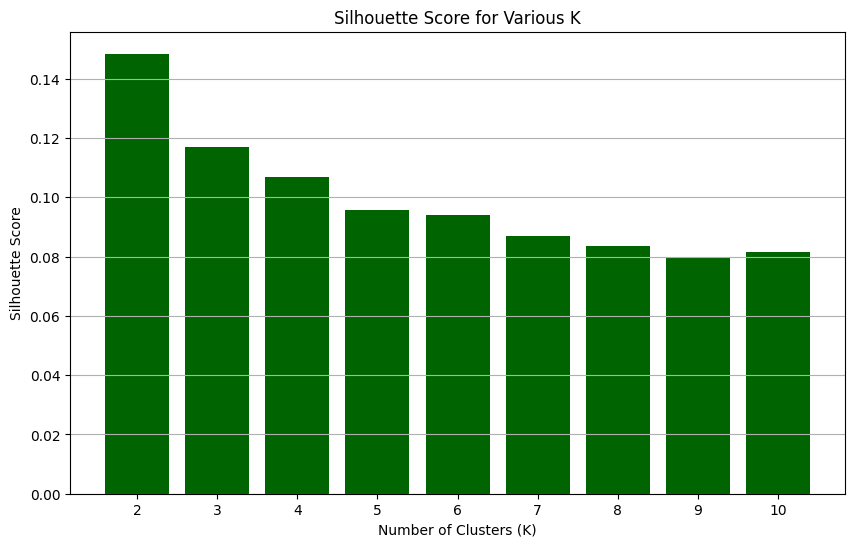

In [20]:
# --- 3. Determine Optimal K using the Silhouette Score ---

silhouette_scores = {}

# We only test a slightly smaller range as Silhouette can be computationally intensive
k_silhouette_range = range(2, min(MAX_K_CLUSTERS, 10) + 1) 

print("Starting Silhouette Score Calculation...")

for k in k_silhouette_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    
    # Silhouette score is computationally demanding, so we use a sample if N is very large
    # For 132k rows, we sample 10,000 points to speed up the process
    if N_ROWS > 10000:
        sample_indices = np.random.choice(N_ROWS, size=10000, replace=False)
        score = silhouette_score(X_pca[sample_indices], cluster_labels[sample_indices])
    else:
        score = silhouette_score(X_pca, cluster_labels)
        
    silhouette_scores[k] = score
    print(f"K={k}: Silhouette Score = {score:.4f}")

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.bar(silhouette_scores.keys(), silhouette_scores.values(), color='darkgreen')
plt.title('Silhouette Score for Various K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(list(silhouette_scores.keys()))
plt.grid(axis='y')
plt.show()

In [21]:
# Find the K with the highest score
best_k_silhouette = max(silhouette_scores, key=silhouette_scores.get)

print(f"Highest Silhouette Score is {silhouette_scores[best_k_silhouette]:.4f} at K={best_k_silhouette}")
print("\nRecommendation: Choose a K that is good in both the Elbow plot and the highest Silhouette Score.")
print("-" * 50)

Highest Silhouette Score is 0.1484 at K=2

Recommendation: Choose a K that is good in both the Elbow plot and the highest Silhouette Score.
--------------------------------------------------


In [ ]:
# in this case lets take k = 2 and then 3,4,5,6 -- just to try and see


In [22]:
from collections import Counter

# --- Configuration (Set your chosen K here) ---
OPTIMAL_K = 2 # <--- use the K you determined from Elbow/Silhouette

In [23]:
# --- 2. K-Means Training and Label Assignment ---

# Train K-Means on the lower-dimensional PCA data
kmeans = KMeans(n_clusters=OPTIMAL_K, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X_pca)

# Get the cluster labels for every session/sequence of clicks
cluster_labels = kmeans.labels_

In [24]:
# --- 3. Create the Interpretation Report (Cluster Profile) ---

# A. Attach the cluster labels to the original feature data (df_encoded_final_vif)
# Note: We use the original features (df_encoded_final_vif) for interpretation because 
# PCA components are abstract; the original features have direct meaning (e.g., 'order').

df_interpreted = df_encoded_final_vif.copy()
df_interpreted['Cluster'] = cluster_labels

# B. Calculate the mean of *each feature* for *each cluster*
cluster_profile = df_interpreted.groupby('Cluster').mean().T

# C. Calculate the size of each cluster
cluster_size = Counter(cluster_labels)
cluster_profile.loc['Cluster Size (%)'] = (
    pd.Series(cluster_size) / len(cluster_labels) * 100
).round(2).sort_index()

# D. Reorder the report so size is at the top
cluster_profile = cluster_profile.sort_index().sort_values(by='Cluster Size (%)', axis=1, ascending=False)

print("\n--- CLUSTER PROFILE REPORT (Feature Means by Cluster) ---")
print(cluster_profile.head())
print(f"\nReport shape: {cluster_profile.shape[0]} features x {OPTIMAL_K} clusters")
print("-" * 50)


--- CLUSTER PROFILE REPORT (Feature Means by Cluster) ---
Cluster                   0          1
Cluster Size (%)  63.870000  36.130000
colour_10          0.033403   0.000000
colour_11          0.035792   0.023727
colour_12          0.064901   0.033344
colour_13          0.031877   0.049190

Report shape: 41 features x 2 clusters
--------------------------------------------------


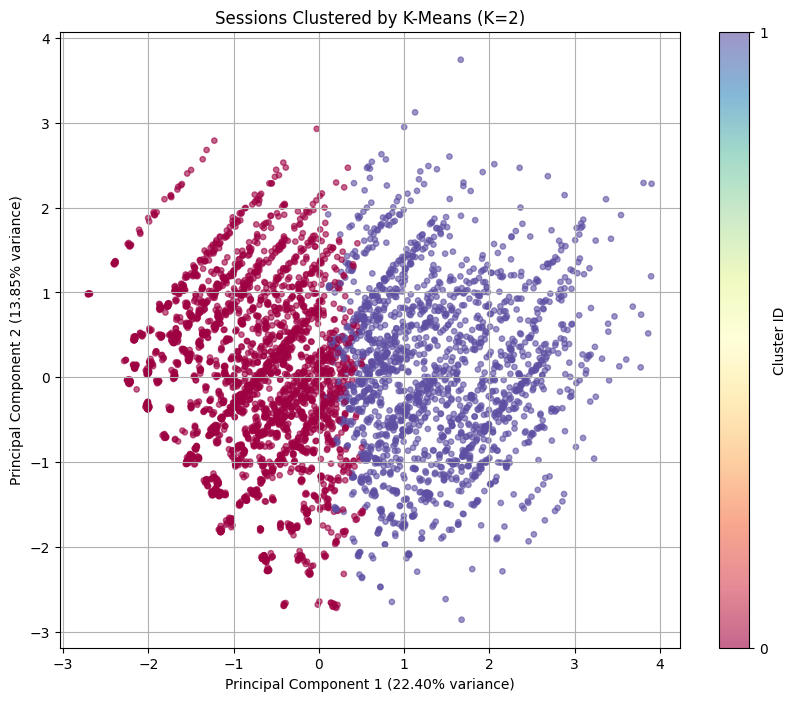

--------------------------------------------------
Visual inspection complete. Now proceed to interpretation.


In [32]:
# --- 4. Visualization (Optional but Highly Recommended) ---

# Project the clusters back onto the first two Principal Components (PC1 and PC2)
# This is for visual confirmation that the clusters are distinct.

# Re-run PCA with 2 components for plotting purposes only
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_pca) # Fit on the full PCA data

df_plot = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
df_plot['Cluster'] = cluster_labels
df_plot = df_plot.sample(n=min(5000, N_ROWS), random_state=42) # Sample for faster plotting

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_plot['PC1'], df_plot['PC2'], 
                      c=df_plot['Cluster'], cmap='Spectral', alpha=0.6, s=15)
plt.title(f'Sessions Clustered by K-Means (K={OPTIMAL_K})')
plt.xlabel(f'Principal Component 1 ({pca_2d.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({pca_2d.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.colorbar(scatter, ticks=range(OPTIMAL_K), label='Cluster ID')
plt.grid(True)
plt.show()

print("-" * 50)
print("Visual inspection complete. Now proceed to interpretation.")

In [25]:
cluster_profile

Cluster,0,1
Cluster Size (%),63.870000,36.130000
colour_10,0.033403,0.000000
colour_11,0.035792,0.023727
colour_12,0.064901,0.033344
colour_13,0.031877,0.049190
colour_14,0.057497,0.165862
colour_2,0.184283,0.172677
colour_3,0.263366,0.023288
colour_4,0.093371,0.110630
colour_5,0.000000,0.028138


In [ ]:
Cluster	0	1
order_transformed_scaled	-0.317165	0.560559
price_transformed_scaled	0.296481	-0.524003

In [ ]:
# next session plan:
# understand the unsupervised learning Process
# interpret the pattern from unsupervised learning
# learn to track it through mlflow

In [29]:
# appending the cluster detail to the preprocessed primary dataset

pd.set_option('display.max_columns', None)
df_interpreted.head()

,model_photography,page,page2_clothing_model_grouped_0,page2_clothing_model_grouped_1,page2_clothing_model_grouped_2,page2_clothing_model_grouped_3,page2_clothing_model_grouped_4,page2_clothing_model_grouped_5,page2_clothing_model_grouped_6,country_grouped_24,country_grouped_29,country_grouped_46,country_grouped_RARE_GROUP,page1_main_category_2,page1_main_category_3,page1_main_category_4,colour_2,colour_3,colour_4,colour_5,colour_6,colour_7,colour_8,colour_9,colour_10,colour_11,colour_12,colour_13,colour_14,location_2,location_3,location_4,location_5,location_6,month_sin,month_cos,day_sin,day_cos,price_transformed_scaled,order_transformed_scaled,Cluster
0,1,2,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.224647e-16,-1.000000,-0.968077,-0.250653,0.440921,1.244064,1
1,0,2,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,5.000000e-01,-0.866025,-0.651372,-0.758758,1.060193,0.090166,0
2,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,-5.000000e-01,-0.866025,0.101168,-0.994869,0.440921,-0.921746,0
3,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5.000000e-01,-0.866025,0.394356,0.918958,0.054251,-0.921746,0
4,0,2,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1.224647e-16,-1.000000,0.968077,-0.250653,1.060193,0.993591,0


In [38]:
df1 = df_interpreted[df_interpreted['Cluster'] == 1]
df0 = df_interpreted[df_interpreted['Cluster'] == 0]

C:\Users\Hp\AppData\Local\Temp\ipykernel_7008\2377782707.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


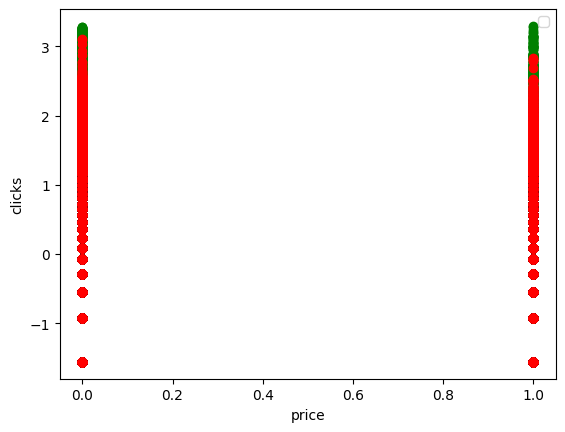

In [40]:
plt.scatter(df1.location_2, df1['order_transformed_scaled'], color = 'green')
plt.scatter(df0.location_2, df0['order_transformed_scaled'], color = 'red')

plt.xlabel('price')
plt.ylabel('clicks')
plt.legend()

In [31]:
# appending the cluster data into the main data
df['Cluster'] = df_interpreted['Cluster']

In [41]:
df1 = df[df['Cluster'] == 1]
df0 = df[df['Cluster'] == 0]

C:\Users\Hp\AppData\Local\Temp\ipykernel_7008\173532485.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


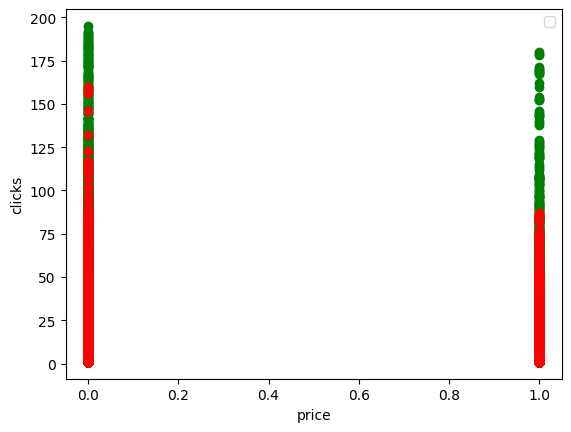

In [44]:
plt.scatter(df1.location_3, df1['order'], color = 'green')
plt.scatter(df0.location_3, df0['order'], color = 'red')

plt.xlabel('price')
plt.ylabel('clicks')
plt.legend()

In [ ]:
# try predict function in unsupervised learning - k-means clusttering

In [ ]:
# Preprocessing


In [78]:
# using a random record from the same train data. just going to change a simple value in order

test_data = df.iloc[[0]]
test_data


,Unnamed: 0,year,month,day,order,country,session_id,page2_clothing_model,model_photography,price,...,location_4,location_5,location_6,month_sin,month_cos,day_sin,day_cos,model_target_encoded_scaled,price_transformed_scaled,order_transformed_scaled
0,0,2008,6,22,21,29,15648,C20,1,48,...,0,0,0,1.224647e-16,-1.0,-0.968077,-0.250653,0.125015,0.440921,1.244064


In [ ]:
# Should not calculate a separate binary encoding and 
# should use the encoded values used in training data to encode the test data set

In [82]:
# Binary encoding
from category_encoders import BinaryEncoder

column_to_encode = 'page2_clothing_model_grouped'

print("---original data shape---")

print(test_data.head())
print(f"Unique values in '{column_to_encode}': {test_data[column_to_encode].nunique()}")
print("-" * 30)

## --- 2. Perform Binary Encoding ---

# 1. Initialize the BinaryEncoder
# We specify the columns we want to encode in a list

# encoder = BinaryEncoder(cols=[column_to_encode])

# 2. Fit and Transform the data
test_data_encoded = encoder.transform(test_data)

## --- 3. Review Results ---

# Get the names of the newly created binary columns
new_binary_cols = [col for col in test_data_encoded.columns if col.startswith(f'{column_to_encode}_') ] 

print("--- Encoded Data Shape ---")
print(f"Original columns: {test_data.shape[1]}")
print(f"New columns: {test_data_encoded.shape[1]}")
print(f"Number of new binary columns: {len(new_binary_cols)}")
print("-" * 30)
print(test_data_encoded.head())

# The original 'page2_clothing_model_grouped' column is replaced by the new binary columns
print(f"\n new binary columns: {new_binary_cols}")

---original data shape---
   Unnamed: 0  year  month  day  order  country  session_id  \
0           0  2008      6   22     21       29       15648   

  page2_clothing_model  model_photography  price  ...  location_4  location_5  \
0                  C20                  1     48  ...           0           0   

   location_6     month_sin month_cos   day_sin   day_cos  \
0           0  1.224647e-16      -1.0 -0.968077 -0.250653   

   model_target_encoded_scaled  price_transformed_scaled  \
0                     0.125015                  0.440921   

   order_transformed_scaled  
0                  1.244064  

[1 rows x 52 columns]
Unique values in 'page2_clothing_model_grouped': 1
------------------------------
--- Encoded Data Shape ---
Original columns: 52
New columns: 58
Number of new binary columns: 7
------------------------------
   Unnamed: 0  year  month  day  order  country  session_id  \
0           0  2008      6   22     21       29       15648   

  page2_clothing_mode

In [83]:
# performing the k-1 rule before calculating VIF for multicollinearity. 
# 1 OHE column(to escape dummy variable trap) must be dropped before performing VIF to avoid the infinty VIF score trap
test_data_encoded.drop(columns=['country_grouped_9','page1_main_category_1','colour_1','location_1'], inplace = True)

In [84]:
# removed the non-essential columns
test_data_encoded.drop(columns = remove,inplace=True) 

In [85]:
df_encoded_final_vif.columns == test_data_encoded.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [86]:
# Transforming data with previously fitted PCA on train data
X_pca_test = pca_final.transform(test_data_encoded)
X_pca_test.shape

(1, 17)

In [87]:
# performing prediction using the previously fitted K-means model on train data
# --- 2. K-Means Training and Label Assignment ---

# Train K-Means on the lower-dimensional PCA data
# kmeans = KMeans(n_clusters=OPTIMAL_K, init='k-means++', n_init=10, random_state=42)
kmeans.predict(X_pca_test)

cluster_labels_test = kmeans.predict(X_pca_test)[0]

In [88]:
test_data_encoded['cluster'] = cluster_labels_test
test_data_encoded

,model_photography,page,page2_clothing_model_grouped_0,page2_clothing_model_grouped_1,page2_clothing_model_grouped_2,page2_clothing_model_grouped_3,page2_clothing_model_grouped_4,page2_clothing_model_grouped_5,page2_clothing_model_grouped_6,country_grouped_24,...,location_4,location_5,location_6,month_sin,month_cos,day_sin,day_cos,price_transformed_scaled,order_transformed_scaled,cluster
0,1,2,0,0,0,0,0,0,1,0,...,0,0,0,1.224647e-16,-1.0,-0.968077,-0.250653,0.440921,1.244064,1


In [90]:
df_interpreted.iloc[[0]]

,model_photography,page,page2_clothing_model_grouped_0,page2_clothing_model_grouped_1,page2_clothing_model_grouped_2,page2_clothing_model_grouped_3,page2_clothing_model_grouped_4,page2_clothing_model_grouped_5,page2_clothing_model_grouped_6,country_grouped_24,...,location_4,location_5,location_6,month_sin,month_cos,day_sin,day_cos,price_transformed_scaled,order_transformed_scaled,Cluster
0,1,2,0,0,0,0,0,0,1,0,...,0,0,0,1.224647e-16,-1.0,-0.968077,-0.250653,0.440921,1.244064,1
